## SQL Salary and Consumer Survey
by Wolfrank Guzman

In this SQL project we combine Python and SQL while generating fictional data using the Faker module.
We will generate information for a fictional survey which details salaries, survey questions, age and other data to then analyze and look for patterns in the data.


        Software: SQL, Python 3.11, VS Code, Jupyter Notebook
        Languages: SQL, Python
        Modules: Seaborn, Pandas, SQLite3, Matplotlib


text goes here...

In [1]:
import pandas as pd
import random
import faker
import seaborn as sns  
import matplotlib.pyplot as plt
import sqlite3


# Create a Faker instance to generate fake data
fake = faker.Faker()
# Define the number of rows in the DataFrame
num_rows = 200
# Initialize empty lists for each column
RecordID = [i for i in range(1, num_rows + 1)]
# List of random sexes
sexes = [random.choice(["Male", "Female"]) for _ in range(num_rows)]
# Generate random first names starting with a random letter based on sex
first_names = [fake.first_name_male() if sex == "Male" else fake.first_name_female() for sex in sexes]
last_names = [fake.last_name() for _ in range(num_rows)]
# List of email endings
email_endings = ["@gmail.com", "@yahoo.com", "@msn.com", "@comcast.net", "@fios.net", "@myspace.com", "@microsoft.net", "@lycos.net"]
# Generate random email addresses using first names
emails = [f"{first.lower()}{random.choice(email_endings)}" for first in first_names]
# Generate other random data
occupations = [random.choice(["Software Developer", "Nurse Practitioner","Software Developer", "Nurse Practitioner", "Electrician", "Marketing Manager", "Dental Hygienist", "Mechanical Engineer", "Social Worker", "Pharmacist", "Financial Analyst", "Physical Therapist", "Graphic Designer", "Veterinarian", "Chef", "Police Officer", "Architect", "Occupational Therapist", "Teacher", "Accountant", "Civil Engineer", "Psychologist", "Plumber", "Web Designer", "Pharmacist Technician", "Registered Nurse", "Lawyer", "Biomedical Engineer", "Librarian", "Human Resources Manager", "Dental Assistant", "Data Analyst", "Radiologic Technologist", "Construction Worker", "Artist", "Environmental Scientist", "Financial Advisor", "Physical Education Teacher", "Chef", "Firefighter", "IT Manager", "Medical Technologist", "Flight Attendant", "Geologist", "Sales Manager", "Speech-Language Pathologist", "Electrician", "Marketing Coordinator", "Physician", "Event Planner", "Economist", "Nurse", "Aerospace Engineer", "Social Media Manager", "Pharmacist", "Investment Banker", "Occupational Therapist", "Professor", "Accountant", "Civil Engineer", "Psychologist", "Plumber", "UX Designer", "Pharmacy Technician", "Registered Nurse", "Journalist", "Biomedical Scientist", "Librarian", "HR Specialist", "Dental Hygienist", "Biotechnologist", "Physical Therapist Assistant", "Police Officer", "Architect", "Elementary School Teacher", "Financial Planner", "Chef", "Game Developer", "Environmental Engineer", "Graphic Designer", "Pediatrician", "Marketing Analyst"]) for _ in range(num_rows)]
countries_of_birth = [fake.country() for _ in range(num_rows)]
# Generate random salaries based on education levels
salaries = []
education = []

for _ in range(num_rows):
    edu_level = random.choice(['BA/BS', 'HS', 'Graduate', 'GED', 'Doctorate', 'Masters'])
    education.append(edu_level)
    
    if edu_level == 'BA/BS':
        salary = random.randint(65000, 250000)
    elif edu_level == 'HS':
        salary = random.randint(45000, 85000)
    elif edu_level == 'Graduate':
        salary = random.randint(125000, 185000)
    elif edu_level == 'GED':
        salary = random.randint(35000, 55000)
    elif edu_level == 'Doctorate':
        salary = random.randint(180000, 385000)
    elif edu_level == 'Masters':
        salary = random.randint(160000, 185000)
        
    salaries.append(salary)
age = [random.randint(22, 65) for _ in range(num_rows)]
years_of_experience = []
for a in age:
    if 22 <= a <= 30:
        years_of_experience.append(random.randint(0, 5))
    elif 30 < a <= 40:
        years_of_experience.append(random.randint(6, 10))
    elif 41 <= a <= 50:
        years_of_experience.append(random.randint(10, 18))
    else:
        years_of_experience.append(random.randint(18, 25))

avg_salary_occupation = [random.randint(30000, 220000) for _ in range(num_rows)]
sscore= [random.randint(1,10) for _ in range(num_rows)]
work_location = [random.choice(["Remote", "Hybrid","On Site"]) for _ in range (num_rows)]

# List of real U.S. state names
us_states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida",
    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
    "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
    "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma",
    "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]

# Generate random states from the list of real U.S. state names
states = [random.choice(us_states) for _ in range(num_rows)]

# Create a DataFrame from the lists
df = pd.DataFrame({
    'RecordID': RecordID,
    'First Name': first_names,
    'Last Name': last_names,
    'Sex': sexes,
    'Age': age,
    'Occupation': occupations,
    'Country of Birth': countries_of_birth,
    'Education': education,
    'Salary': salaries,
    'Email': emails,
    'Years of Experience': years_of_experience,
    'Avg Salary for Occupation': avg_salary_occupation,
    'State': states, 
    'Satisfaction Score': sscore,
    'Work Location': work_location
})

# Display the first few rows of the DataFrame
display(df)


,RecordID,First Name,Last Name,Sex,Age,Occupation,Country of Birth,Education,Salary,Email,Years of Experience,Avg Salary for Occupation,State,Satisfaction Score,Work Location
0,1,Shannon,Nguyen,Female,30,Lawyer,Philippines,HS,48818,shannon@lycos.net,2,77844,South Carolina,4,Hybrid
1,2,Randall,Livingston,Male,49,Journalist,Lao People's Democratic Republic,Graduate,142078,randall@comcast.net,17,168018,Michigan,4,Remote
2,3,Eugene,Horton,Male,29,Investment Banker,Saint Kitts and Nevis,Graduate,161648,eugene@fios.net,3,153120,Rhode Island,10,Hybrid
3,4,Scott,Wilson,Male,48,Biomedical Engineer,South Georgia and the South Sandwich Islands,GED,40460,scott@msn.com,13,214127,Alabama,4,Hybrid
4,5,Victor,King,Male,62,Librarian,Hong Kong,Graduate,138140,victor@fios.net,25,208772,Kansas,9,Remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Erika,Perkins,Female,63,Professor,Ireland,Doctorate,336490,erika@gmail.com,25,71323,Virginia,5,Remote
196,197,Allison,Potter,Female,51,Lawyer,Finland,BA/BS,176882,allison@yahoo.com,18,181795,Louisiana,3,Remote
197,198,James,Smith,Male,55,Biomedical Engineer,Martinique,Doctorate,251836,james@microsoft.net,18,211198,Hawaii,4,Hybrid
198,199,Kevin,Bowers,Male,32,Geologist,El Salvador,HS,74524,kevin@fios.net,9,177431,Utah,7,Hybrid


In [2]:
# Create and connect to a SQLite database
conn = sqlite3.connect('data.db')
# Create a DataFrame and store it in the database
df.to_sql('data', conn, if_exists='replace')
# Create a cursor for executing SQL queries
cursor = conn.cursor()

# 3. Select the average salary for all occupations
cursor.execute("SELECT AVG(Salary) FROM data")
average_salary = cursor.fetchone()[0]
print("\n3. Average Salary:", average_salary)



3. Average Salary: 142138.59


In [3]:


# 5. Select the records of individuals with salaries above $100,000
cursor.execute("SELECT * FROM data WHERE Salary > 200000")
results = cursor.fetchall()
print("\n5. Records of individuals with salaries above $200,000:")
for row in results:
    print(row)




5. Records of individuals with salaries above $200,000:
(5, 6, 'John', 'Mcguire', 'Male', 42, 'Psychologist', 'Belize', 'Doctorate', 216173, 'john@fios.net', 18, 97478, 'Iowa', 7, 'Remote')
(13, 14, 'Christopher', 'Daugherty', 'Male', 55, 'Teacher', 'Anguilla', 'Doctorate', 326800, 'christopher@lycos.net', 19, 46302, 'Kentucky', 4, 'Remote')
(15, 16, 'Jody', 'Harris', 'Female', 64, 'Biotechnologist', 'Bouvet Island (Bouvetoya)', 'Doctorate', 235159, 'jody@microsoft.net', 23, 130958, 'North Carolina', 8, 'Hybrid')
(30, 31, 'Sonya', 'Johnson', 'Female', 34, 'Civil Engineer', 'Bosnia and Herzegovina', 'Doctorate', 278678, 'sonya@yahoo.com', 6, 30693, 'Minnesota', 7, 'Hybrid')
(32, 33, 'Kaitlyn', 'Kramer', 'Female', 53, 'Marketing Manager', 'Bosnia and Herzegovina', 'Doctorate', 231803, 'kaitlyn@myspace.com', 18, 113280, 'Alaska', 10, 'Remote')
(35, 36, 'Ronald', 'Miller', 'Male', 57, 'Librarian', 'Pitcairn Islands', 'Doctorate', 319332, 'ronald@lycos.net', 23, 165206, 'New York', 6, 'Rem

In [4]:

# 6. Select the youngest person's record
cursor.execute("SELECT * FROM data ORDER BY Age ASC LIMIT 1")
youngest_person = cursor.fetchone()
print("\n6. Youngest Person:", youngest_person)




6. Youngest Person: (6, 7, 'John', 'Hanna', 'Male', 22, 'Teacher', 'Qatar', 'HS', 78959, 'john@myspace.com', 0, 48676, 'Delaware', 10, 'Hybrid')


In [5]:


# 7. Select the occupations and their average salaries
cursor.execute("SELECT Occupation, AVG(Salary) FROM data GROUP BY Occupation")
results = cursor.fetchall()
print("\n7. Average salary for each occupation:")
for row in results:
    print(row)
    



7. Average salary for each occupation:
('Accountant', 223852.0)
('Aerospace Engineer', 136995.0)
('Architect', 93614.0)
('Artist', 165046.33333333334)
('Biomedical Engineer', 108692.66666666667)
('Biotechnologist', 149495.8)
('Chef', 182338.16666666666)
('Civil Engineer', 135893.4)
('Construction Worker', 138672.5)
('Data Analyst', 52457.0)
('Dental Assistant', 39161.0)
('Dental Hygienist', 137384.75)
('Economist', 103167.0)
('Electrician', 173749.25)
('Elementary School Teacher', 228980.33333333334)
('Environmental Engineer', 99591.5)
('Environmental Scientist', 155073.0)
('Event Planner', 134385.0)
('Financial Advisor', 174612.5)
('Financial Analyst', 149033.25)
('Financial Planner', 158710.0)
('Firefighter', 125635.0)
('Flight Attendant', 157258.0)
('Game Developer', 145238.66666666666)
('Geologist', 174313.33333333334)
('Graphic Designer', 154801.0)
('HR Specialist', 104300.5)
('Human Resources Manager', 88893.66666666667)
('IT Manager', 46385.0)
('Investment Banker', 160835.0)
('

In [6]:


# 8. Count the number of people in each age group
cursor.execute("SELECT CASE \
                 WHEN Age BETWEEN 22 AND 30 THEN '22-30' \
                 WHEN Age BETWEEN 31 AND 40 THEN '31-40' \
                 WHEN Age BETWEEN 41 AND 50 THEN '41-50' \
                 ELSE '51 and over' \
               END AS Age_Group, COUNT(*) \
               FROM data GROUP BY Age_Group")
results = cursor.fetchall()
print("\n8. Count of people in each age group:")
for row in results:
    print(row)




8. Count of people in each age group:
('22-30', 36)
('31-40', 43)
('41-50', 51)
('51 and over', 70)


In [7]:



# 9. Select the highest salary and the corresponding occupation
cursor.execute("SELECT Occupation, MAX(Salary) FROM data")
result = cursor.fetchone()
print("\n9. Occupation with Highest Salary:", result)




9. Occupation with Highest Salary: ('Police Officer', 372074)


In [8]:


# Close the database connection
#conn.close()


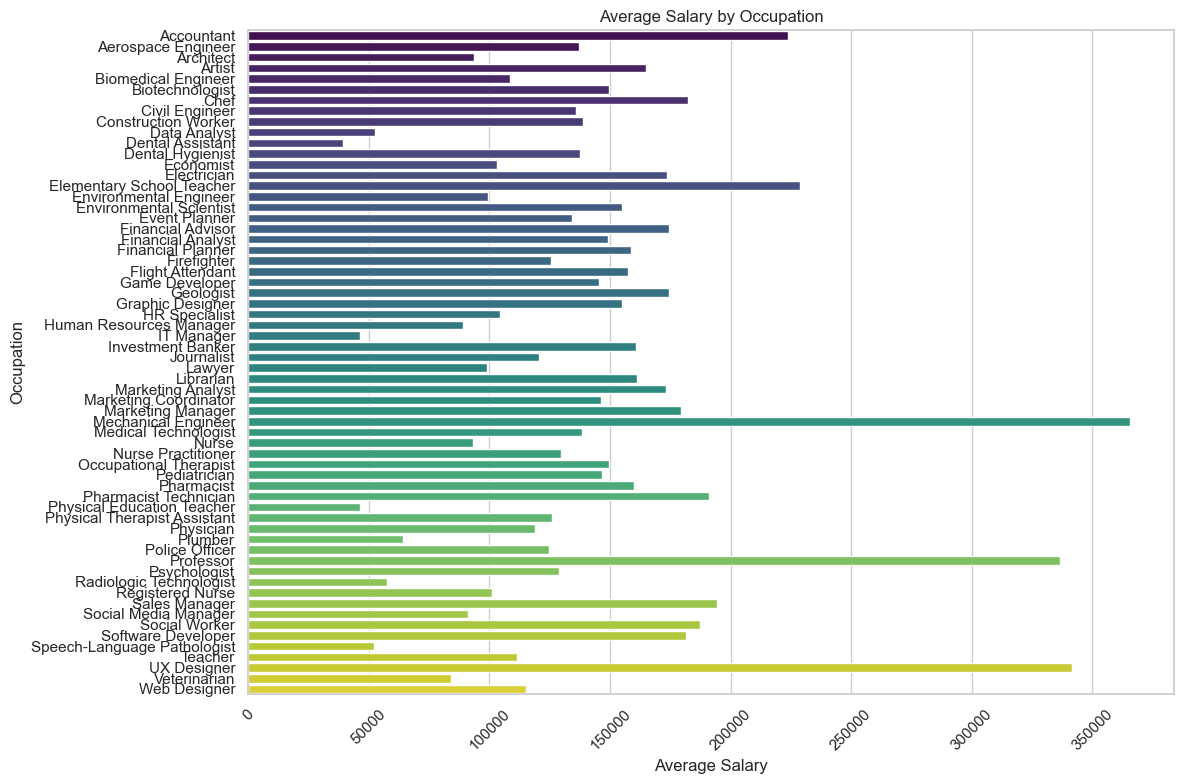

In [9]:
# Create a SQLite database connection


# Execute the SQL query to select occupations and their average salaries
cursor.execute("SELECT Occupation, AVG(Salary) FROM data GROUP BY Occupation")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Occupation', 'Average Salary'])

# Close the database connection
#conn.close()

# Create a Seaborn barplot to visualize the average salaries for each occupation
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.barplot(x='Average Salary', y='Occupation', data=df, palette='viridis')
plt.title('Average Salary by Occupation')
plt.xlabel('Average Salary')
plt.ylabel('Occupation')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


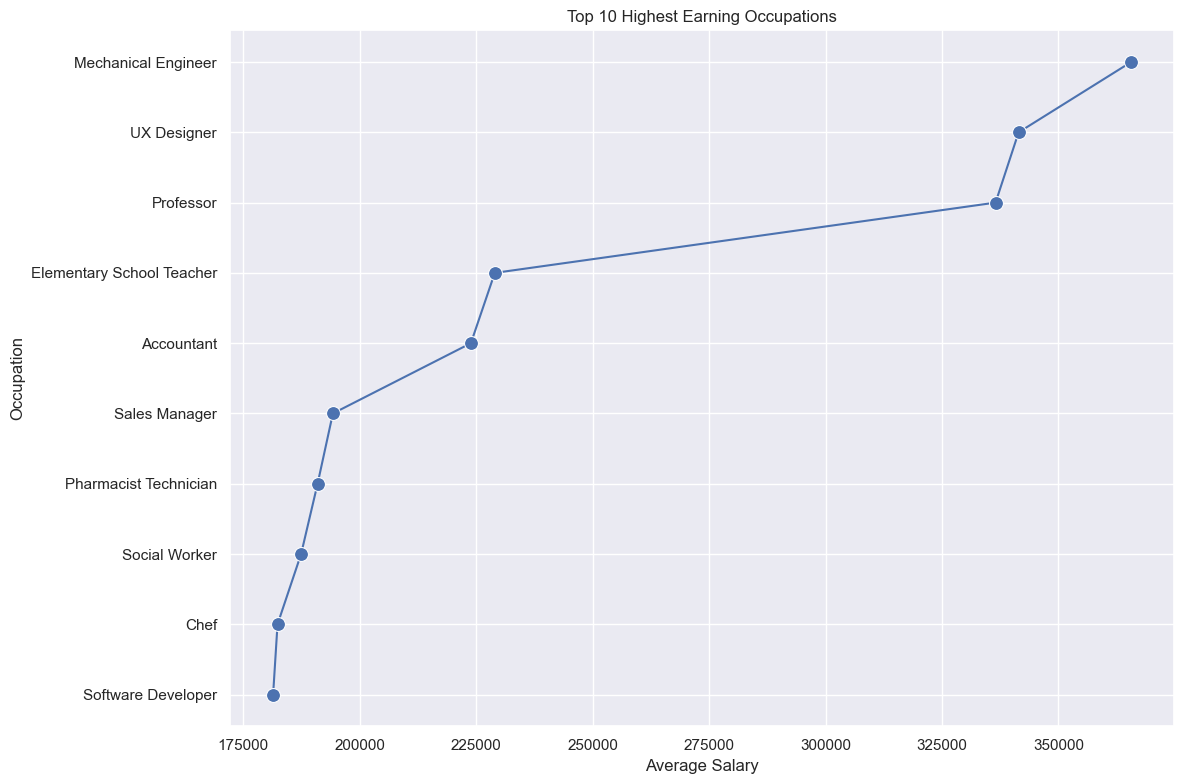

In [10]:
# Execute the SQL query to select the top 10 highest earning occupations
cursor.execute("SELECT Occupation, AVG(Salary) AS AvgSalary FROM data GROUP BY Occupation ORDER BY AvgSalary DESC LIMIT 10")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Occupation', 'Average Salary'])



# Create a Seaborn line chart to visualize the salaries of the top 10 highest earning occupations
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
sns.lineplot(x='Average Salary', y='Occupation', data=df, marker='o', markersize=10, color='b')
plt.title('Top 10 Highest Earning Occupations')
plt.xlabel('Average Salary')
plt.ylabel('Occupation')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

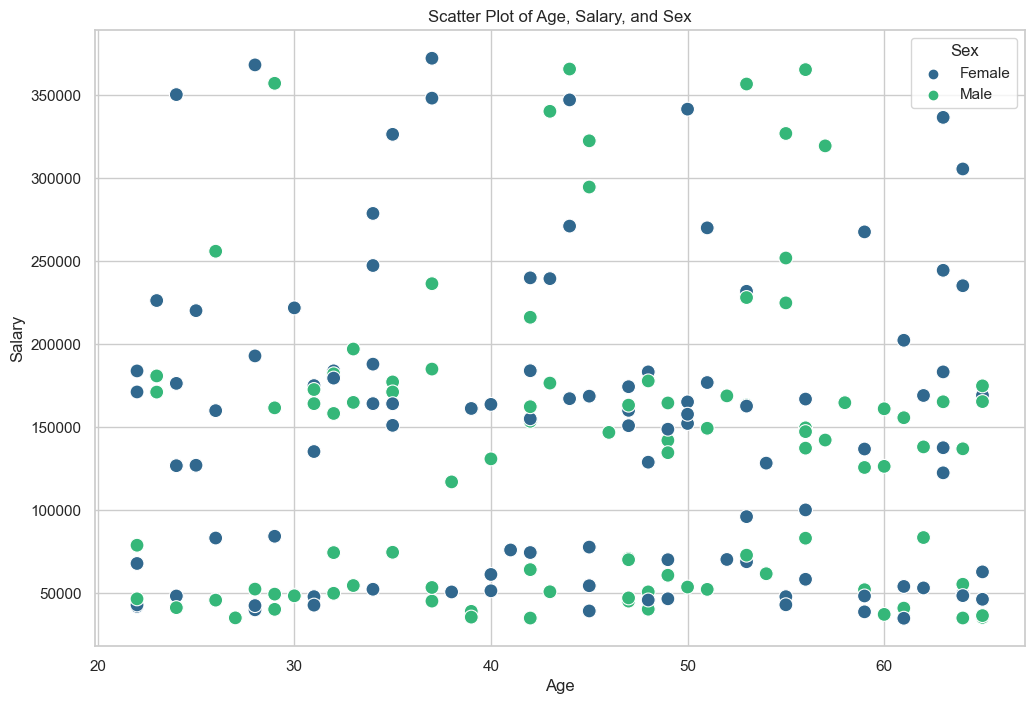

In [11]:

# Execute the SQL query to select age, salary, and sex data
cursor.execute("SELECT Age, Salary, Sex FROM data")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Age', 'Salary', 'Sex'])

# Close the database connection
#conn.close()

# Create a Seaborn scatter plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Specify the data and mapping of variables to plot
sns.scatterplot(x='Age', y='Salary', hue='Sex', data=df, palette='viridis', s=100)

# Customize plot labels and title
plt.title('Scatter Plot of Age, Salary, and Sex')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Sex')

# Show the plot
plt.show()


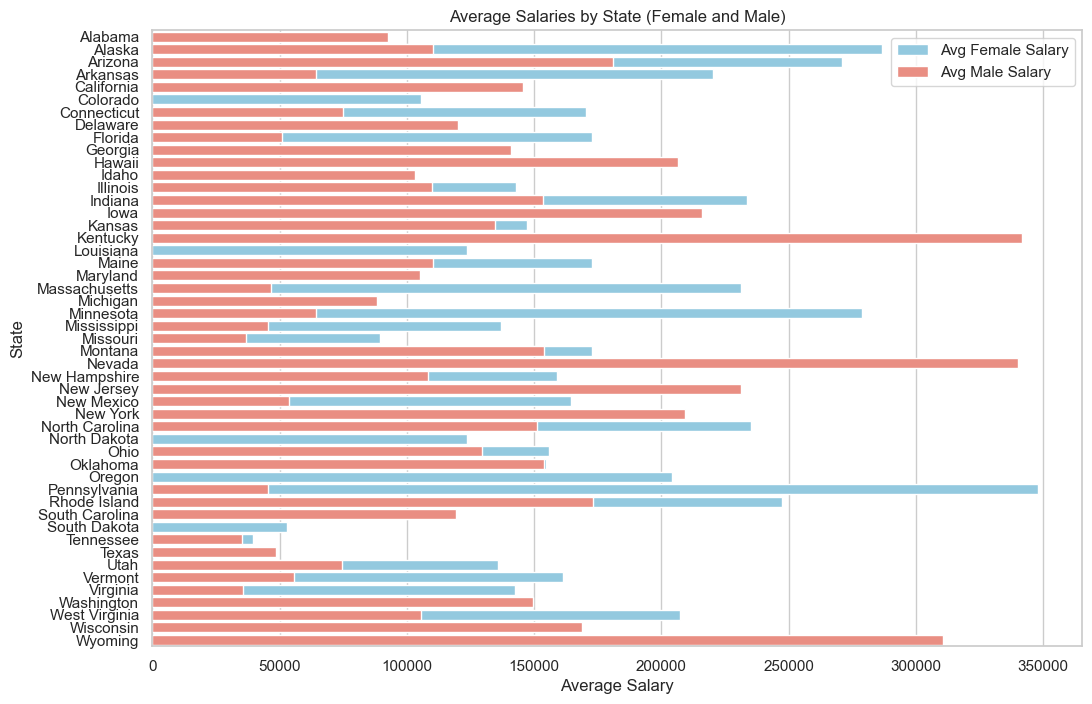

In [12]:
# Execute the SQL query to calculate average salary for females and males by state
cursor.execute("""
    SELECT State,
           AVG(CASE WHEN Sex = 'Female' THEN Salary END) AS AvgFemaleSalary,
           AVG(CASE WHEN Sex = 'Male' THEN Salary END) AS AvgMaleSalary
    FROM data
    GROUP BY State
    """)
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['State', 'AvgFemaleSalary', 'AvgMaleSalary'])

# Close the database connection
#conn.close()

# Create a Seaborn horizontal bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Sort the DataFrame by state name
df.sort_values(by='State', inplace=True)

# Create horizontal bar plots for average female and male salaries
sns.barplot(x='AvgFemaleSalary', y='State', data=df, color='skyblue', label='Avg Female Salary')
sns.barplot(x='AvgMaleSalary', y='State', data=df, color='salmon', label='Avg Male Salary')

# Customize plot labels and title
plt.title('Average Salaries by State (Female and Male)')
plt.xlabel('Average Salary')
plt.ylabel('State')
plt.legend()

# Show the plot
plt.show()


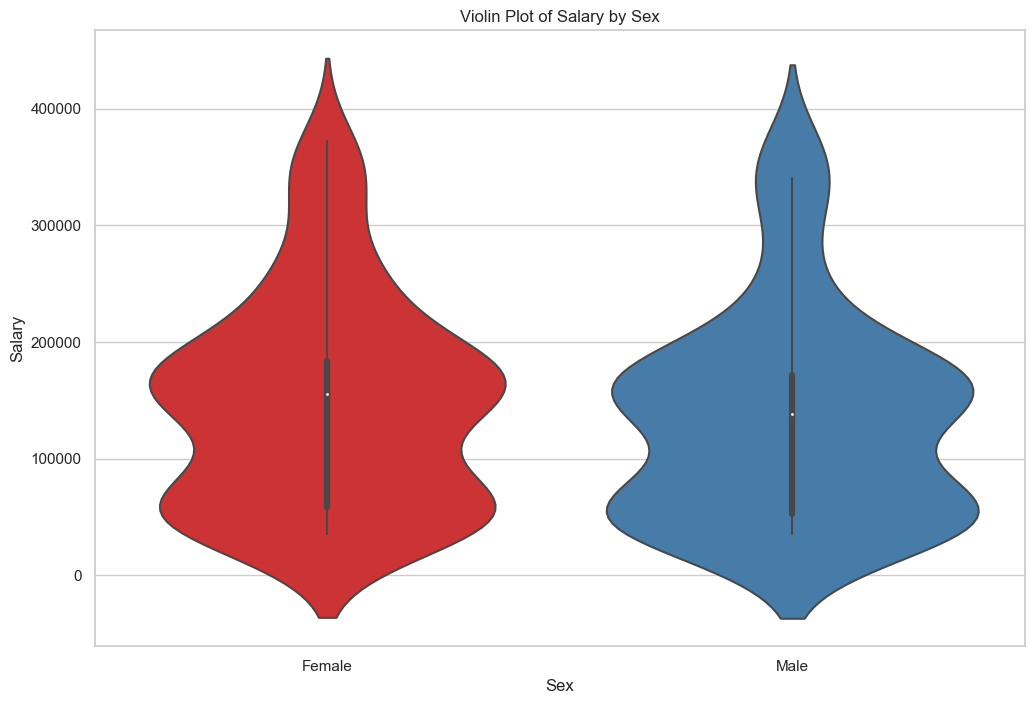

In [13]:
# Execute the SQL query to select the data for the violin plot
cursor.execute("SELECT Sex, Salary FROM data")
results = cursor.fetchall()

# Convert the query results into a DataFrame
df = pd.DataFrame(results, columns=['Sex', 'Salary'])

# Close the database connection
#conn.close()

# Create a Seaborn violin plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.violinplot(x='Sex', y='Salary', data=df, palette='Set1')

# Customize plot labels and title
plt.title('Violin Plot of Salary by Sex')
plt.xlabel('Sex')
plt.ylabel('Salary')

# Show the plot
plt.show()


In [14]:
query2 = """
SELECT Education, AVG(Salary) AS AvgSalary
FROM data
GROUP BY Education;
"""
result2 = pd.read_sql_query(query2, conn)
print(result2)

   Education      AvgSalary
0      BA/BS  152768.043478
1  Doctorate  288786.638889
2        GED   44935.888889
3   Graduate  153242.815789
4         HS   64343.833333
5    Masters  169359.892857


In [15]:
# 5. Count the Number of Records by Country of Birth and Education Level
query5 = """
SELECT "Country of Birth", Education, COUNT(*) AS RecordCount
FROM data
GROUP BY "Country of Birth", Education;
"""
result5 = pd.read_sql_query(query5, conn)
print(result5)

                                 Country of Birth  Education  RecordCount
0                                     Afghanistan      BA/BS            1
1                                          Angola   Graduate            1
2                                        Anguilla  Doctorate            1
3    Antarctica (the territory South of 60 deg S)  Doctorate            1
4                                       Argentina   Graduate            1
..                                            ...        ...          ...
180                                       Uruguay      BA/BS            1
181                                    Uzbekistan    Masters            1
182                                       Vanuatu   Graduate            1
183                                         Yemen      BA/BS            1
184                                      Zimbabwe         HS            1

[185 rows x 3 columns]


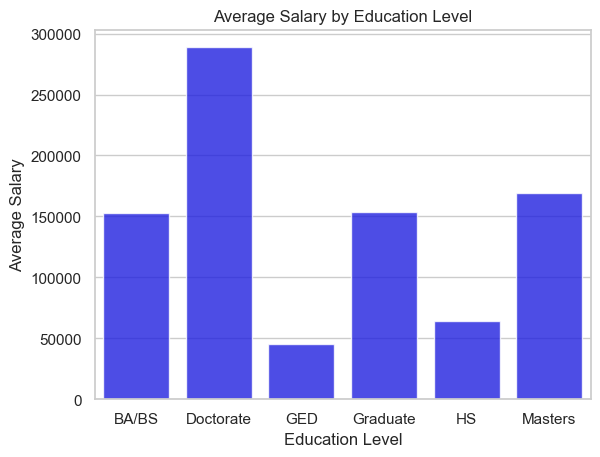

In [16]:


# 2. Calculate Average Salary by Education Level
query2 = """
SELECT Education, AVG(Salary) AS AvgSalary
FROM data
GROUP BY Education;
"""
result2 = pd.read_sql_query(query2, conn)

# Visualize query results where applicable
# Example: Visualize average salary by education level
sns.barplot(x='Education', y='AvgSalary', data=result2, color='blue', alpha=0.8)
plt.title('Average Salary by Education Level')
plt.xticks(rotation=0)
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.show()


In [17]:


# 4. Calculate Satisfaction Score Statistics by Gender
query4 = """
SELECT Sex, MIN("Satisfaction Score") AS MinScore,
       MAX("Satisfaction Score") AS MaxScore,
       AVG("Satisfaction Score") AS AvgScore
FROM data
GROUP BY Sex;
"""
result4 = pd.read_sql_query(query4, conn)

print(result4)


      Sex  MinScore  MaxScore  AvgScore
0  Female         1        10   5.47619
1    Male         1        10   5.40000


In [18]:

# 5. Count the Number of Records by Country of Birth and Education Level
query5 = """
SELECT "Country of Birth", Education, COUNT(*) AS RecordCount
FROM data
GROUP BY "Country of Birth", Education;
"""
result5 = pd.read_sql_query(query5, conn)
print(result5)
# Close the database connection
/#conn.close()



# You can similarly visualize other query results using Seaborn or other visualization libraries.


                                 Country of Birth  Education  RecordCount
0                                     Afghanistan      BA/BS            1
1                                          Angola   Graduate            1
2                                        Anguilla  Doctorate            1
3    Antarctica (the territory South of 60 deg S)  Doctorate            1
4                                       Argentina   Graduate            1
..                                            ...        ...          ...
180                                       Uruguay      BA/BS            1
181                                    Uzbekistan    Masters            1
182                                       Vanuatu   Graduate            1
183                                         Yemen      BA/BS            1
184                                      Zimbabwe         HS            1

[185 rows x 3 columns]


In [19]:
query7= """
WITH RankedRecords AS (
    SELECT
        "Country of Birth",
        Education,
        COUNT(*) AS RecordCount,
        ROW_NUMBER() OVER(PARTITION BY Education ORDER BY COUNT(*) DESC) AS Rank
    FROM data
    GROUP BY "Country of Birth", Education
)

SELECT "Country of Birth", Education, RecordCount
FROM RankedRecords
WHERE Rank = 1;

""" 

result7 = pd.read_sql_query(query7, conn)
print(result7)

            Country of Birth  Education  RecordCount
0                     Guinea      BA/BS            2
1     Bosnia and Herzegovina  Doctorate            3
2  Bouvet Island (Bouvetoya)        GED            2
3                 Bangladesh   Graduate            2
4                     Bhutan         HS            2
5                  Australia    Masters            1
